<a href="https://colab.research.google.com/github/bigairboy/Stat-6289/blob/main/Pubh_6852_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 4.1**

In [166]:
import sys
import csv
import math

# Making list of elements using list comprehension
arguments = [sys.argv[i] for i in range(1,len(sys.argv))]

# calculating log ,square ,sine and cosine function
with open('results.csv','w',newline='') as file:
    data = csv.writer(file,delimiter=';')
    for i in arguments:
        log = math.log(int(i))
        square = int(i)**2
        sin = math.sin(int(i))
        cosine = math.cos(int(i))
        
        # writing these values to csv file
        data.writerow([log,square,sin,cosine])

**Problem 4.2**

In [144]:
import numpy as np

mat=np.arange(1,101).reshape(10, 10)

# printing matrix
print(mat)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


In [90]:
import numpy as np
def num_elements(m):
   elements=0
   for rows in m:

     for columns in rows:

        elements += 1

   return elements

def num_rows(m):
   row = 0

   for rows in m:
      row += 1
   return row

def num_columns(m):

   elements = num_elements(m)

   row = num_rows(m)

   cols = elements/row
   return int(cols)

if __name__ == '__main__':

  mat = np.arange(10,30).reshape((4,5))
  print("Your matrix----")
  print(mat)
  print()
  print(f'Total elements = {num_elements(mat)}')
  print(f'Rows = {num_rows(mat)}')
  print(f'Columns = {num_columns(mat)}')

Your matrix----
[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]

Total elements = 20
Rows = 4
Columns = 5


In [145]:
def row_means(mat):
    row_mean=[]
    
    for i in mat:
        row_mean.append(sum(i)/len(mat))
        
    return row_mean
        
    
def column_means(mat):
    col_means=[]
   
    for i in range(len(mat[0])):
        total=0
        for j in range(len(mat)):
            total+= mat[j][i]
            
        col_means.append(total/len(mat[0]))
        
    return col_means
            
            
    
def main():
    rows= int(input("Number of rows: "))
    cols = int(input("Number of columns: "))
    matrix=[]
    
   
    for i in range(rows):
        sub=[]
        for j in range(cols):
            sub.append(int(input()))
            
        matrix.append(sub)
    
    print("\nThe matrix is:")
    for row in matrix:
        print(row)
            
    print("\nRow wise means: ",row_means(matrix))
    print("\nColumn wise means: ",column_means(matrix))
            
    
    
    
    
main()

Number of rows: 3
Number of columns: 3
1
2
3
4
5
6
7
8
9

The matrix is:
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

Row wise means:  [2.0, 5.0, 8.0]

Column wise means:  [4.0, 5.0, 6.0]


In [148]:
def getSpaced(a, b,n):
        if n < 2:
                return b
        temp = (float(b) - a)/(n - 1)
        return [temp * i + a  for i in range(n)]

b = getSpaced(11,23,50)

rt = sum([x * x for x in b])

print(rt)

15074.48979591837


**Problem 4.3**

In [149]:
import numpy as np



data = np.array([[0.12, 0.08, 0.06, 0.02],[0.01, 0.07, 0.11, 0.09],[0.03, 0.04, 0.04, 0.02],[0.05, 0.09, 0.11, 0.14]])

#print
print(data)

[[0.12 0.08 0.06 0.02]
 [0.01 0.07 0.11 0.09]
 [0.03 0.04 0.04 0.02]
 [0.05 0.09 0.11 0.14]]


In [150]:

meanPerGene = data.mean(axis = 1)

#print the mean

print(meanPerGene)

[0.07   0.07   0.0325 0.0975]


In [151]:


meanPerTimePoint = data.mean(axis = 0)

#print the mean per time point

print(meanPerTimePoint)

[0.0525 0.07   0.08   0.0675]


In [152]:


maximumMmean = np.where(meanPerGene == max(data.mean(axis = 1)))

#print the index

print(f"The gene on index number { maximumMmean [0][0]} has the maximum mean.")

The gene on index number 3 has the maximum mean.


**Problem 4.4**

In [142]:
import csv,os,sys,pickle
import numpy as np

txtFile = "/content/cellcycle.txt"        # make sure that you have correct path to cellcycle.txt here

## read the file once to get numRows and numCols
numRows = 0
reader = csv.reader(open(txtFile, 'r'),delimiter='\t')
expListIDs = next(reader)
expListIDs = np.array(expListIDs[1:])
for linja in reader:
    numRows+=1

## populate a matrix and name vectors with file info
numColumns = len(expListIDs)
exprMat = np.zeros([numRows,numColumns])
reader = csv.reader(open(txtFile, 'r'),delimiter='\t')
header = next(reader)
rowInd = 0
geneList = []

for linja in reader:
    row = np.array(linja[1:])
    newRow = np.zeros(len(row),)
    nanInds = np.where(row == '')
    goodInds = np.where(row != '')
    newRow[nanInds] = np.nan
    newRow[goodInds] = [float(element) for element in row[goodInds]]
    exprMat[rowInd,:] = newRow
    rowInd +=1
    geneList.append(linja[0])
geneList = np.array(geneList)

## print out info
print("--------------")
print("matrix of size (%s,%s)  created" % (exprMat.shape))
print("gene list size:\t%s" % geneList.size)
print("exp list size:\t%s" % expListIDs.size)
print("--------------")

## write the data to a file
outFilePath = os.path.join(".","excercise.pickle")
tmp = open(outFilePath,'wb')
pickle.dump([geneList,expListIDs,exprMat],tmp)
tmp.close()

--------------
matrix of size (6178,82)  created
gene list size:	6178
exp list size:	82
--------------


TypeError: ignored

**Problem 4.5**

In [131]:
import numpy
import matplotlib.pyplot as plt
import statistics

x = []
y1 = []
y2 = []
y3 = []
y4 = []
for line in open('/content/RADIOLOGY.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y1.append(int(lines[1]))
    y2.append(int(lines[2]))
    y3.append(int(lines[3]))
    y4.append(int(lines[4]))
    n1 = statistics.mean(y1)
    n2 = statistics.mean(y2)
    n3 = statistics.mean(y3)
    n4 = statistics.mean(y4)
print(n1)
print(n2)
print(n3)
print(n4)

3151.7096774193546
6209.258064516129
1383.3225806451612
1135.5483870967741


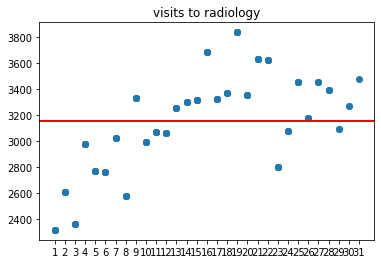

In [138]:
import numpy
import matplotlib.pyplot as plt
import statistics

x = []
y1 = []
y2 = []
y3 = []
y4 = []
for line in open('/content/RADIOLOGY.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y1.append(int(lines[1]))
    y2.append(int(lines[2]))
    y3.append(int(lines[3]))
    y4.append(int(lines[4]))
    plt.scatter(x, y1)
    plt.axhline(y = 3151.7096774193546, color = 'r', linestyle = '-')
    plt.title("visits to radiology")
  
plt.show()

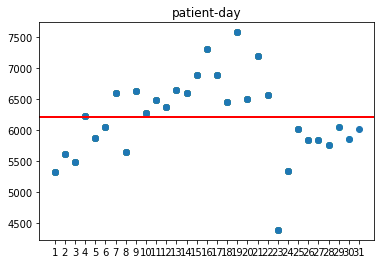

In [139]:
import numpy
import matplotlib.pyplot as plt
  
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for line in open('/content/RADIOLOGY.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y1.append(int(lines[1]))
    y2.append(int(lines[2]))
    y3.append(int(lines[3]))
    y4.append(int(lines[4]))
    plt.scatter(x, y2)
    plt.axhline(y = 6209.258064516129, color = 'r', linestyle = '-')
    plt.title("patient-day")
plt.show()

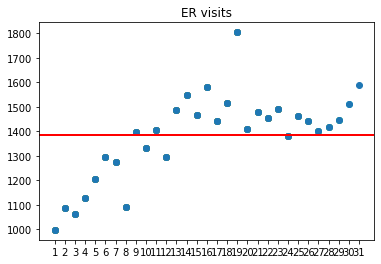

In [140]:
import numpy
import matplotlib.pyplot as plt
  
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for line in open('/content/RADIOLOGY.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y1.append(int(lines[1]))
    y2.append(int(lines[2]))
    y3.append(int(lines[3]))
    y4.append(int(lines[4]))
    plt.scatter(x, y3)
    plt.axhline(y = 1383.3225806451612, color = 'r', linestyle = '-')
    plt.title("ER visits")
plt.show()

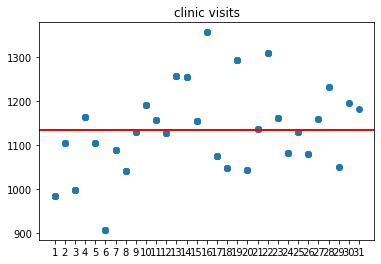

In [141]:
import numpy
import matplotlib.pyplot as plt
  
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for line in open('/content/RADIOLOGY.txt', 'r'):
    lines = [i for i in line.split()]
    x.append(lines[0])
    y1.append(int(lines[1]))
    y2.append(int(lines[2]))
    y3.append(int(lines[3]))
    y4.append(int(lines[4]))
    plt.scatter(x, y4)
    plt.axhline(y = 1135.5483870967741, color = 'r', linestyle = '-')
    plt.title("clinic visits")
plt.show()